In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *


In [2]:
N_objects = 2000
num_bootstraps = 5

objects_dict = {
  'delta_uniform': lambda : np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=False) for i in range(N_objects)]),
  'delta_nonuniform': lambda: np.array([sample_amplitude_object('delta', num_deltas=1, gaussian_mixture_position=True) for i in range(N_objects)]),
  'white_noise': lambda : np.array([sample_amplitude_object('white_noise') for i in range(N_objects)]),
  'pink_noise': lambda : np.array([sample_amplitude_object('pink_noise') for i in range(N_objects)]),
  '8_deltas_uniform': lambda :np.array([sample_amplitude_object('delta', num_deltas=8, gaussian_mixture_position=False) for i in range(N_objects)]),
  '8_deltas_nonuniform': lambda : np.array([sample_amplitude_object('delta', num_deltas=8, gaussian_mixture_position=True) for i in range(N_objects)]),
}


noise_sigma_list = [1e-6, 1e-5, 1e-4, 1e-3, 4e-3]

# num_nyquist_samples = int(NUM_NYQUIST_SAMPLES // 2)
num_nyquist_samples = NUM_NYQUIST_SAMPLES

mi_by_object = {}
for name, objects_fn in objects_dict.items():
  print(name)
  mutual_information = []
  for noise_sigma in tqdm(noise_sigma_list):
    results = []
    for k in range(num_bootstraps):
      initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(objects_fn, noise_sigma)
      results.append(optimized_mi)
    mutual_information.append(np.max(np.array(results)))
  mi_by_object[name] = mutual_information

delta_uniform


  0%|                                                | 0/5 [00:00<?, ?it/s]

initial loss -13.501836200034663
initial loss -12.963715046373547
initial loss -12.98033819206577
initial loss -12.946458437113595
initial loss -13.58134074533567


 20%|███████▊                               | 1/5 [04:12<16:50, 252.57s/it]

initial loss -9.523502831076527
initial loss -9.78010085206574
initial loss -9.725266804771593
initial loss -9.404509642973329
initial loss -9.695987324230128


 40%|███████████████▌                       | 2/5 [08:40<13:05, 261.67s/it]

initial loss -6.137092692496493
initial loss -6.422088372424795
initial loss -6.7890378680843195
initial loss -6.596720573024119
initial loss -6.59800405902017


 60%|███████████████████████▍               | 3/5 [13:05<08:46, 263.26s/it]

initial loss -3.178997974905312
initial loss -3.4806201654874296
initial loss -3.3622561655866274
initial loss -3.8597541483769637
initial loss -3.09040057490634


 80%|███████████████████████████████▏       | 4/5 [17:32<04:24, 264.59s/it]

initial loss -1.2277776633318391
initial loss -1.6173475964191968
initial loss -2.026326138980566
initial loss -1.5298899895411777
initial loss -1.7713271639378227


100%|███████████████████████████████████████| 5/5 [21:56<00:00, 263.23s/it]


delta_nonuniform


  0%|                                                | 0/5 [00:00<?, ?it/s]

initial loss -11.221657195653865
initial loss -10.969325099760077
initial loss -11.557100787482359
initial loss -12.18196594875037
initial loss -11.858694603860439


 20%|███████▊                               | 1/5 [04:07<16:28, 247.08s/it]

initial loss -8.009982230915375
initial loss -8.077948626998703
initial loss -7.927196131412382
initial loss -8.601563639580753
initial loss -8.327119808926504


 40%|███████████████▌                       | 2/5 [08:14<12:21, 247.30s/it]

initial loss -5.842163873554905
initial loss -5.343366747920939
initial loss -5.725161864372154
initial loss -5.449243794889495
initial loss -5.414716360679844


 60%|███████████████████████▍               | 3/5 [12:22<08:15, 247.52s/it]

initial loss -2.712958533147372
initial loss -2.5728169790033486
initial loss -2.577156687286455
initial loss -2.661780959228081
initial loss -2.5664955382759613


 80%|███████████████████████████████▏       | 4/5 [16:32<04:08, 248.49s/it]

initial loss -1.1926735253591652
initial loss -1.0856882505558534
initial loss -1.3584732462695963
initial loss -1.181334109658234
initial loss -1.310465947054445


100%|███████████████████████████████████████| 5/5 [20:37<00:00, 247.52s/it]


white_noise


  0%|                                                | 0/5 [00:00<?, ?it/s]

initial loss -9.120399469401633
initial loss -9.017687973351263
initial loss -8.963653542922867
initial loss -9.235943568770775
initial loss -8.624576981816496


 20%|███████▊                               | 1/5 [04:04<16:18, 244.50s/it]

initial loss -5.332390670922191
initial loss -5.596392659533796
initial loss -6.122661581146467
initial loss -5.734358438366027
initial loss -5.594272037223936


 40%|███████████████▌                       | 2/5 [08:10<12:16, 245.54s/it]

initial loss -2.541185049141942
initial loss -2.323069932155397
initial loss -2.159291616836871
initial loss -2.4701382140019197
initial loss -2.5747179115733845


 60%|███████████████████████▍               | 3/5 [12:15<08:10, 245.02s/it]

initial loss -0.3184088692887388
initial loss -0.2526688801558478
initial loss -0.25523359502433396
initial loss -0.24013986073887555
initial loss -0.23387854134373945


 80%|███████████████████████████████▏       | 4/5 [16:19<04:04, 244.81s/it]

initial loss -0.008311094774830205
initial loss -0.014610938790154748
initial loss -0.018110461930196844
initial loss -0.032014580517285514
initial loss -0.02521848114415437


100%|███████████████████████████████████████| 5/5 [20:24<00:00, 244.82s/it]


pink_noise


  0%|                                                | 0/5 [00:00<?, ?it/s]

initial loss -9.081064209105525
initial loss -8.838806270089929
initial loss -9.149768414371614
initial loss -9.196841774896695
initial loss -9.03661069585623


 20%|███████▊                               | 1/5 [04:30<18:01, 270.44s/it]

initial loss -5.560459268143084
initial loss -5.631539011077685
initial loss -5.7934201673728865
initial loss -5.458918945117484
initial loss -5.788263488274925


 40%|███████████████▌                       | 2/5 [08:59<13:29, 269.89s/it]

initial loss -2.776564893944192
initial loss -2.5682993614670355
initial loss -2.2357371473273133
initial loss -2.5946544391783135
initial loss -2.7952264134705036


 60%|███████████████████████▍               | 3/5 [13:29<08:59, 269.53s/it]

initial loss -0.29112102840287213
initial loss -0.28813421415498375
initial loss -0.4371943773780996
initial loss -0.2895423651040626
initial loss -0.272977524800952


 80%|███████████████████████████████▏       | 4/5 [17:58<04:29, 269.49s/it]

initial loss -0.030100668674737173
initial loss -0.01351145109391452
initial loss -0.028159120412294056
initial loss -0.028635474805475597
initial loss -0.024507608438884963


100%|███████████████████████████████████████| 5/5 [22:28<00:00, 269.77s/it]


8_deltas_uniform


  0%|                                                | 0/5 [00:00<?, ?it/s]

initial loss -11.653942464815264
initial loss -11.723492466603952
initial loss -11.593363173013717
initial loss -11.926974320290245
initial loss -11.803083198410913


 20%|███████▊                               | 1/5 [03:59<15:57, 239.26s/it]

initial loss -8.614455014342113
initial loss -8.780317891288288
initial loss -8.460932090590267
initial loss -8.303988986781977
initial loss -8.389348017084258


 40%|███████████████▌                       | 2/5 [07:57<11:55, 238.43s/it]

initial loss -5.547355137872255
initial loss -5.232511149299386
initial loss -5.438815786118086
initial loss -5.27464361150061
initial loss -4.969889729036239


 60%|███████████████████████▍               | 3/5 [11:54<07:56, 238.03s/it]

initial loss -1.9460311135431123
initial loss -1.6714309170041892
initial loss -2.252165097639295
initial loss -2.234040854440873
initial loss -2.0854976377533068


 80%|███████████████████████████████▏       | 4/5 [15:51<03:57, 237.74s/it]

initial loss -0.694272539279574
initial loss -0.5833214911229126
initial loss -0.5837302144456034
initial loss -0.7217184287851977
initial loss -0.5357822281281911


100%|███████████████████████████████████████| 5/5 [19:49<00:00, 237.94s/it]


8_deltas_nonuniform


  0%|                                                | 0/5 [00:00<?, ?it/s]

initial loss -10.206560084669984
initial loss -10.506034694758132
initial loss -10.373717796048117
initial loss -10.215108923708824
initial loss -9.880959755652599


 20%|███████▊                               | 1/5 [04:07<16:31, 247.79s/it]

initial loss -6.976533507296592
initial loss -7.206249248051606
initial loss -6.7682567648134215
initial loss -6.920000669265036
initial loss -7.289375949117317


 40%|███████████████▌                       | 2/5 [08:16<12:24, 248.10s/it]

initial loss -3.8284819882987327
initial loss -4.319930441561752
initial loss -4.404293635644828
initial loss -3.9426256356276363
initial loss -4.151141498538998


 60%|███████████████████████▍               | 3/5 [12:25<08:17, 248.70s/it]

initial loss -1.3266984795869339
initial loss -1.5310248199265608
initial loss -1.5921141778382109
initial loss -1.5151983026233942
initial loss -1.676485133829787


 80%|███████████████████████████████▏       | 4/5 [16:35<04:09, 249.29s/it]

initial loss -0.47648025138900896
initial loss -0.4344751917762206
initial loss -0.39725102479524327
initial loss -0.4323228201650531
initial loss -0.4180223115023207


100%|███████████████████████████████████████| 5/5 [20:45<00:00, 249.06s/it]


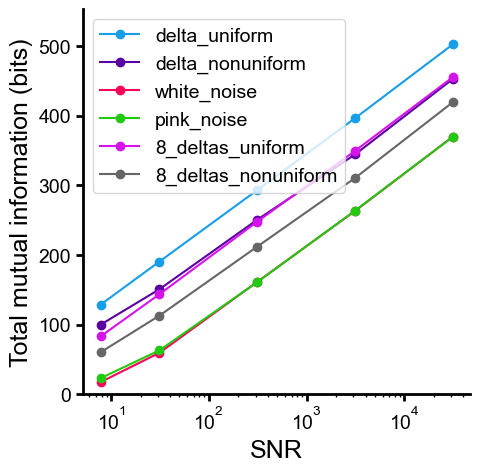

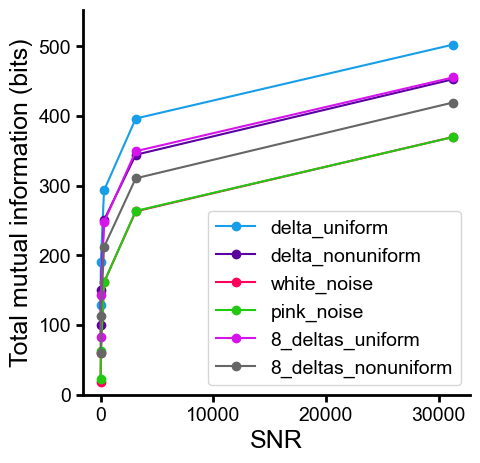

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

snr = (1 / NUM_NYQUIST_SAMPLES) / np.array(noise_sigma_list)

for object_name, mutual_information in mi_by_object.items():
    total_mi = np.array(mutual_information) * NUM_NYQUIST_SAMPLES

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.semilogx(snr, total_mi, 'o-', label=object_name)
    ax.set_xlabel('SNR')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

clear_spines(ax)
ax.legend()



fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for object_name, mutual_information in mi_by_object.items():
    total_mi = np.array(mutual_information) * NUM_NYQUIST_SAMPLES

    # ax.plot(num_samples, mutual_information, 'o-')
    ax.plot(snr, total_mi, 'o-', label=object_name)
    ax.set_xlabel('SNR')
    ax.set_ylabel('Total mutual information (bits)')

    ax.set(ylim=(0, max(1.1 * np.max(total_mi), ax.get_ylim()[1])))

clear_spines(ax)
ax.legend()